In [1]:
import os
root = os.getcwd()
print(root)

/Users/kinbunhua/cs521/cnn_nasi


Figure 1. Samples of Nasi from the data-set:

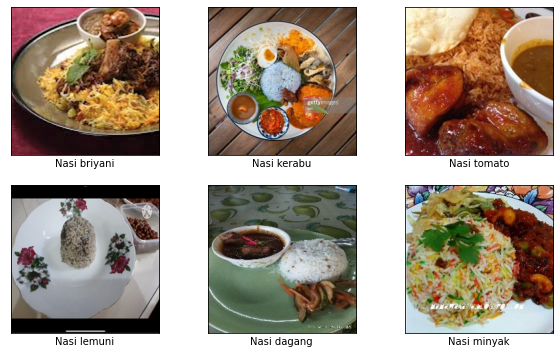

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from tqdm import tqdm

DATADIR = root + "/Nasi"

CATEGORIES = ["Nasi briyani", "Nasi kerabu", "Nasi tomato", "Nasi lemuni", "Nasi dagang", "Nasi minyak"]

plt.figure(figsize = (10, 6))
i = 0
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    i = i + 1
    plt.subplot(2, 3, i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #print(path)
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        #print(os.path.join(path,img))
        img_array = mpimg.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.xlabel(category)
        break  # we just want one for now so break
plt.show()  # display!

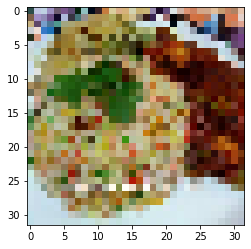

In [3]:
IMG_SIZE = 32

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 300/300 [00:00<00:00, 601.04it/s]

1824


In [5]:
import random

random.shuffle(training_data)

In [7]:
X = []
y = []
channels = 3
num_classes = len(CATEGORIES)
INPUT_SIZE = IMG_SIZE * IMG_SIZE * channels
for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X.shape, y.shape)
#import train_test_split function
from sklearn.model_selection import train_test_split

#split the dataset into training and test sets 
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
print(num_classes)
print(y[0])
print(y[1])

6
4
5


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#defines the options for augmentation 
datagen = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

def image_augmentation(image, nb_of_augmentation):
    '''
    Generates new images bei augmentation 
    image : raw image 
    nb_augmentation: number of augmentations 
    images: array with new images 
    '''
    images = [] 
    image = image.reshape(1, IMG_SIZE, IMG_SIZE, channels)
    i = 0 
    for x_batch in datagen.flow(image, batch_size = 1):
        images.append(x_batch)
        i += 1 
        if i >= nb_of_augmentation:
            #interrupt augmentation 
            break 
    return images 

In [12]:
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.applications.vgg16 import VGG16
def create_model1():
    model = VGG16(include_top = False, input_shape = (IMG_SIZE, IMG_SIZE, channels))

    #add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(256, activation='relu')(flat1)
    #dropout 
    class2 = Dropout(0.5)(class1)
    class3 = Dense(64, activation='relu')(class2)
    #normalization 
    class4 = BatchNormalization()(class3)
    output = Dense(num_classes, activation='softmax')(class3)

    #define new model
    model_new = Model(inputs = model.inputs, outputs = output)

    # make all layers untrainable by freezing weights (except for last layer)
    for l, layer in enumerate(model_new.layers[:-1]):
        layer.trainable = False

    # ensure the last layer is trainable/not frozen
    for l, layer in enumerate(model_new.layers[-1:]):
        layer.trainable = True

    model_new.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model_new 

def create_model2():
    model = VGG16(include_top = False, input_shape = (IMG_SIZE, IMG_SIZE, channels))

    #add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(512, activation='relu')(flat1)
    class2 = Dense(512, activation='relu')(class1)
    class3 = Dense(512, activation='relu')(class2)
    output = Dense(num_classes, activation='softmax')(class3)

    #define new model
    model_new = Model(inputs = model.inputs, outputs = output)

    # make all layers untrainable by freezing weights (except for last layer)
    for l, layer in enumerate(model_new.layers[:-1]):
        layer.trainable = False

    # ensure the last layer is trainable/not frozen
    for l, layer in enumerate(model_new.layers[-1:]):
        layer.trainable = True

    model_new.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model_new 

def create_model3():
    model = VGG16(include_top = False, input_shape = (IMG_SIZE, IMG_SIZE, channels))

    #add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    class2 = Dense(1024, activation='relu')(class1)
    class3 = Dense(1024, activation='relu')(class2)
    output = Dense(num_classes, activation='softmax')(class3)

    #define new model
    model_new = Model(inputs = model.inputs, outputs = output)

    # make all layers untrainable by freezing weights (except for last layer)
    for l, layer in enumerate(model_new.layers[:-1]):
        layer.trainable = False

    # ensure the last layer is trainable/not frozen
    for l, layer in enumerate(model_new.layers[-1:]):
        layer.trainable = True

    model_new.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model_new 

#no freezing weights
def create_model4():
    model = VGG16(include_top = False, input_shape = (IMG_SIZE, IMG_SIZE, channels))

    #add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    class2 = Dense(1024, activation='relu')(class1)
    class3 = Dense(1024, activation='relu')(class2)
    output = Dense(num_classes, activation='softmax')(class3)

    #define new model
    model_new = Model(inputs = model.inputs, outputs = output)

    model_new.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model_new 

In [11]:
create_model1().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [16]:
create_model2().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [37]:
create_model3().summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [12]:
import tensorflow as tf 

def preprocess_data(images, targets, use_augmentation = False, nb_of_augmentation = 1):
    '''
    images : raw image 
    targets : target label
    use_augmentation : True if augmentation should be used 
    nb_of_augmentation : if use_augmentation = True, number of augmentations 
    '''
    X = []
    y = [] 
    for x_, y_ in zip(images, targets):
        #scaling pixels between 0.0-1.0 
        x_ = x_ / 255. 

        #data augmentation 
        if use_augmentation:
            argu_img = image_augmentation(x_, nb_of_augmentation)
            for a in argu_img:
                X.append(a.reshape(IMG_SIZE, IMG_SIZE, channels))
                y.append(y_)
        
        X.append(x_.reshape(IMG_SIZE, IMG_SIZE, channels))
        y.append(y_)

    print("*Preprocessiong completed:%i samples\n" % len(X))
    #print(X)
    firstargu = np.array(X)
    print(firstargu.shape)
    secondargu = tf.keras.utils.to_categorical(y)
    return firstargu, secondargu

In [13]:
nb_augmentation = 2 #defines the number of additional augmentations of one image
X_train_shaped, y_train_shaped = preprocess_data(
    X, y,
    use_augmentation=True,
    nb_of_augmentation=nb_augmentation
)

X_test_shaped, y_test_shaped = preprocess_data(X_test, y_test)

*Preprocessiong completed:4377 samples

(4377, 32, 32, 3)
*Preprocessiong completed:365 samples

(365, 32, 32, 3)


In [29]:
from sklearn.model_selection import train_test_split 
batch_size = 20
num_epochs = 80   #original 80  
iterations = 1   #original 5 number of iterations

def tunning_parameter(vgg, path):
    histories = []
    for i in range(0, iterations):
        print('Running iteration:%i' % i)

        #saving the best checkpoint for each iteration 
        filepath = path % i

        X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_shaped, y_train_shaped, test_size=0.2, random_state=42)

        history = vgg.fit(
            X_train_, y_train_,
            batch_size=batch_size,
            epochs=num_epochs,
            verbose=1,
            validation_data=(X_val_, y_val_),
            callbacks=[
                tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
            ]
        )
        histories.append(history.history)
        return histories

def get_avg(histories, his_key):
    tmp = []
    for history in histories:
        tmp.append(history[his_key][np.argmin(history['val_loss'])])
    return np.mean(tmp)

test_loss = []
test_accs = []

def get_test_loss_accs(path):
    for i in range(0, iterations): 
        cnn_ = tf.keras.models.load_model(path % i)
        
        score = cnn_.evaluate(X_test_shaped, y_test_shaped, verbose=0)
        test_loss.append(score[0])
        test_accs.append(score[1])
        
        print('running final test with model %i: %0.4f loss / %0.4f acc' % (i, score[0], score[1]))
        
    print('\nAverage loss / accuracy on testset: %0.4f loss / %0.5f acc' % (np.mean(test_loss),np.mean(test_accs)))
    print('Standard deviation: (+-%0.4f) loss / (+-%0.4f) acc' % (np.std(test_loss),np.std(test_accs)))

def plot_acc_loss(title, histories, key_acc, key_loss):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    #accuracy 
    ax1.set_title("Model accuracy (%s)" % title)

    names = []

    for i, model in enumerate(histories):
        ax1.plot(model[key_acc])
        ax1.set_xlabel('epoch')
        names.append("Model %i" % i)
        ax1.set_ylabel('accuracy')
    ax1.legend(names, loc='upper left')

    #Loss 
    ax2.set_title("model loss (%s)" % title)
    for model in histories:
        ax2.plot(model[key_loss])
        ax2.set_xlabel('epoch')
        ax2.set_ylabel('loss')
    ax2.legend(names, loc = 'upper right')
    fig.set_size_inches(20, 5)
    plt.show()

def plot_train_val(title, history):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    #Accuracy 
    ax1.set_title("Model accuracy - %s" % title)
    ax1.plot(history['accuracy'])
    ax1.plot(history['val_accuracy'])
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.legend(['train', 'validation'], loc='upper left')

    #loss 
    ax2.set_title("model loss - %s" % title)
    ax2.plot(history['loss'])
    ax2.plot(history['val_loss'])
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('loss')
    ax2.legend(['train', 'validation'], loc = 'upper left')

    fig.set_size_inches(20,5)
    plt.show()

def plot_sample_predictions(classes, model, X_test, y_test):
    '''
    this function displays images randomly and tries to predict the correct class
    '''

    class_ = 0
    images_per_row = 3 
    rows = int(len(classes) / images_per_row)  #image_per_row
    #print(rows, X_test, y_test)
    for i in range(rows):
        fig, axis = plt.subplots(1, images_per_row)
        #print(axis)
        for i, axis in enumerate(axis):
            #print(class_, i, axis)
            elements = np.squeeze(np.argwhere(y_test == class_))
            len_e = len(elements) 
            random = np.random.randint(len_e)
            #print(random, elements, elements[random])
            X = X_test[elements[random]]
            y = y_test[elements[random]]

            fig.set_size_inches(12, 24)

            x_reshape = X.reshape([1, IMG_SIZE, IMG_SIZE, channels])
            axis.text(0, 34, 'Predicted:{}'.format(classes[np.argmax(model.predict(x_reshape))]))
            axis.text(0, 38, 'Correct:{}'.format(classes[y]))
            axis.imshow(np.squeeze(X), cmap = 'gray')
            
            axis.axis('off')
            class_ += 1
    plt.show()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools 

def plot_confusion_matrix(cm, class_, title='Confusion matrix', cmap = plt.cm.Reds):
    '''
    this function plots a confusion matrix
    '''
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                horizontalalignment = 'center',
                color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

In [33]:
histories = tunning_parameter(create_model1(), 'vgg_dropout_nasi-%i.hdf5')

Running iteration:0
Epoch 1/80
175/176 [============================>.] - ETA: 0s - loss: 1.8664 - accuracy: 0.1760
Epoch 1: val_loss improved from inf to 1.75513, saving model to vgg_dropout_nasi-0.hdf5
176/176 [==============================] - 36s 198ms/step - loss: 1.8664 - accuracy: 0.1759 - val_loss: 1.7551 - val_accuracy: 0.2432
Epoch 2/80
175/176 [============================>.] - ETA: 0s - loss: 1.7920 - accuracy: 0.2123
Epoch 2: val_loss improved from 1.75513 to 1.71352, saving model to vgg_dropout_nasi-0.hdf5
176/176 [==============================] - 34s 193ms/step - loss: 1.7920 - accuracy: 0.2122 - val_loss: 1.7135 - val_accuracy: 0.3025
Epoch 3/80
175/176 [============================>.] - ETA: 0s - loss: 1.7542 - accuracy: 0.2491
Epoch 3: val_loss improved from 1.71352 to 1.68451, saving model to vgg_dropout_nasi-0.hdf5
176/176 [==============================] - 34s 194ms/step - loss: 1.7542 - accuracy: 0.2494 - val_loss: 1.6845 - val_accuracy: 0.3664
Epoch 4/80
175/176

In [34]:
print('Training: \t%0.8f loss / %0.8f acc'   % (get_avg(histories,'loss'), get_avg(histories,'accuracy')))
print('Validation: \t%0.8f loss / %0.8f acc' % (get_avg(histories,'val_loss'), get_avg(histories,'val_accuracy')))

Training: 	1.56947243 loss / 0.36960867 acc
Validation: 	1.48445773 loss / 0.49657536 acc


running final test with model 0: 1.5446 loss / 0.4110 acc

Average loss / accuracy on testset: 1.2898 loss / 0.51689 acc
Standard deviation: (+-0.1802) loss / (+-0.0749) acc
------------1-----------


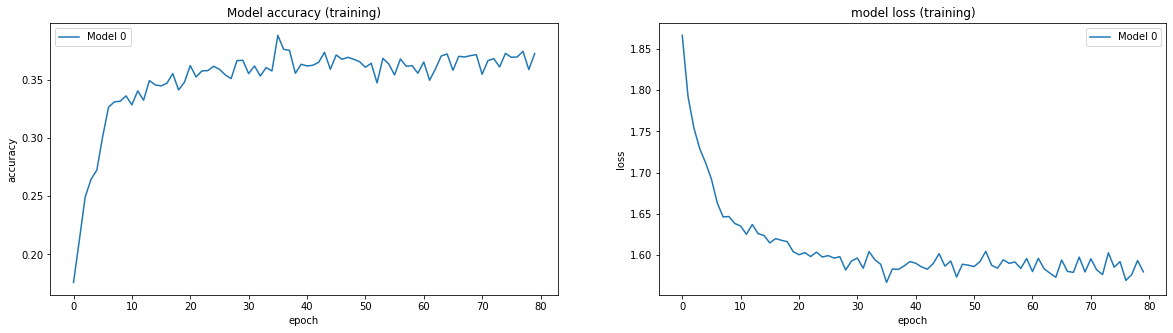

------------2-----------


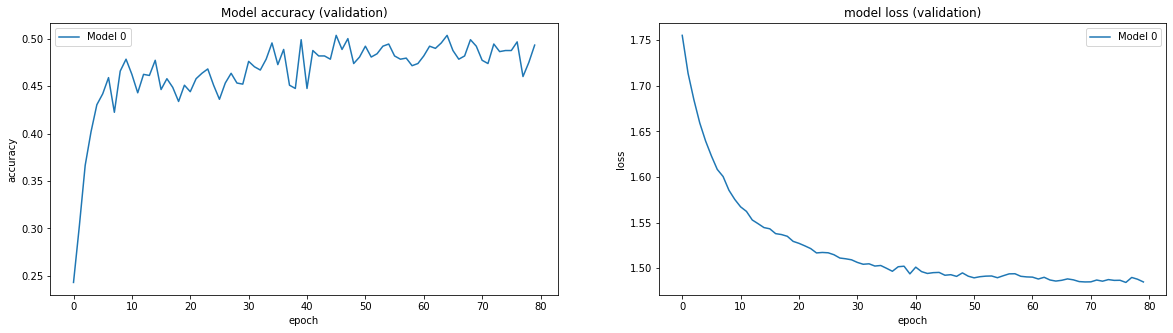

-------------3----------


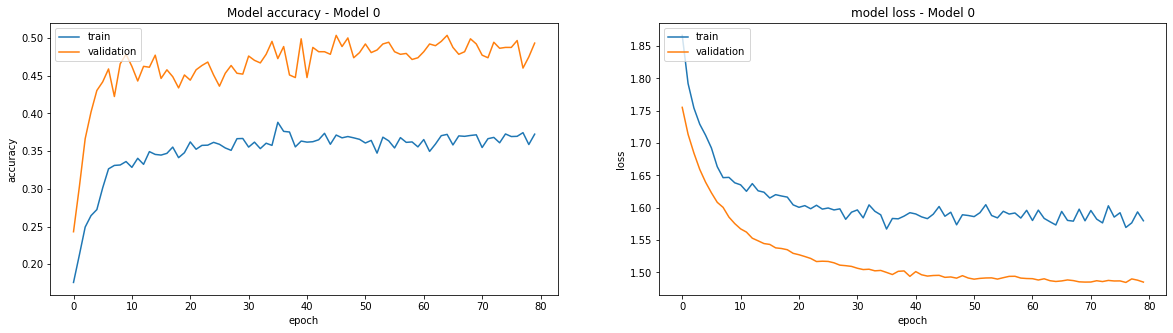

------------4-----------


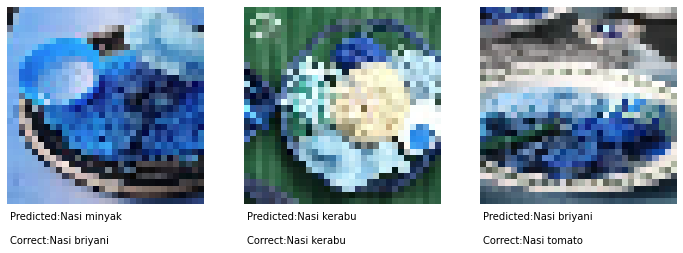

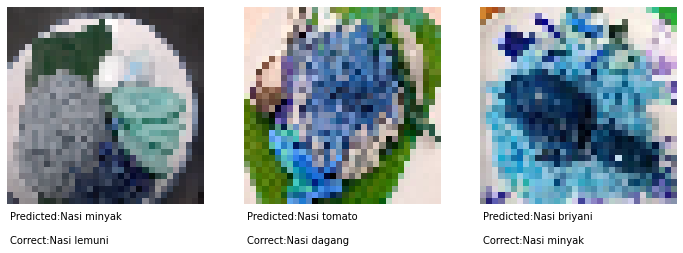

------------5-----------


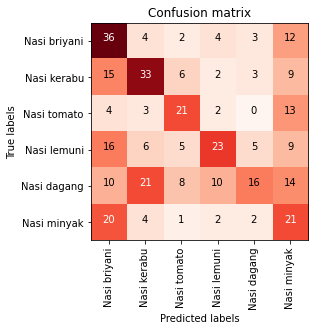

              precision    recall  f1-score   support

           0       0.36      0.59      0.44        61
           1       0.46      0.49      0.47        68
           2       0.49      0.49      0.49        43
           3       0.53      0.36      0.43        64
           4       0.55      0.20      0.30        79
           5       0.27      0.42      0.33        50

    accuracy                           0.41       365
   macro avg       0.44      0.42      0.41       365
weighted avg       0.45      0.41      0.40       365



In [35]:
path = "vgg_dropout_nasi-%i.hdf5"
get_test_loss_accs(path)
print("------------1-----------")
plot_acc_loss("training", histories, 'accuracy', 'loss')
print("------------2-----------")
plot_acc_loss('validation', histories, 'val_accuracy', 'val_loss')
print("-------------3----------")
RUN = 0 #you can choose one of the different models trained above 
plot_train_val("Model %i" % RUN, histories[RUN])
print("------------4-----------")
model = create_model1()
model.load_weights(path % RUN)
plot_sample_predictions(list(CATEGORIES), model, X_test_shaped, np.array(y_test))

predictions = model.predict(X_test_shaped, verbose = 0)
predictions = np.argmax(predictions, axis=1)
print("------------5-----------")
plot_confusion_matrix(confusion_matrix(y_test, predictions), list(CATEGORIES))
print(classification_report(y_test, predictions))

In [17]:
histories2 = tunning_parameter(create_model2(), 'vgg_large_dense_nasi-%i.hdf5')

Running iteration:0
Epoch 1/80
175/176 [============================>.] - ETA: 0s - loss: 1.6742 - accuracy: 0.3646
Epoch 1: val_loss improved from inf to 1.56249, saving model to vgg_large_dense_nasi-0.hdf5
176/176 [==============================] - 40s 220ms/step - loss: 1.6742 - accuracy: 0.3648 - val_loss: 1.5625 - val_accuracy: 0.4475
Epoch 2/80
175/176 [============================>.] - ETA: 0s - loss: 1.4902 - accuracy: 0.4926
Epoch 2: val_loss improved from 1.56249 to 1.43267, saving model to vgg_large_dense_nasi-0.hdf5
176/176 [==============================] - 45s 254ms/step - loss: 1.4903 - accuracy: 0.4924 - val_loss: 1.4327 - val_accuracy: 0.4874
Epoch 3/80
175/176 [============================>.] - ETA: 0s - loss: 1.3850 - accuracy: 0.5203
Epoch 3: val_loss improved from 1.43267 to 1.34574, saving model to vgg_large_dense_nasi-0.hdf5
176/176 [==============================] - 41s 233ms/step - loss: 1.3849 - accuracy: 0.5204 - val_loss: 1.3457 - val_accuracy: 0.5160
Epoch 

In [19]:
print('Training: \t%0.8f loss / %0.8f acc'   % (get_avg(histories2,'loss'), get_avg(histories2,'accuracy')))
print('Validation: \t%0.8f loss / %0.8f acc' % (get_avg(histories2,'val_loss'), get_avg(histories2,'val_accuracy')))

Training: 	0.76360202 loss / 0.73893172 acc
Validation: 	0.90239561 loss / 0.66894978 acc


running final test with model 0: 1.1624 loss / 0.5699 acc

Average loss / accuracy on testset: 1.1624 loss / 0.56986 acc
Standard deviation: (+-0.0000) loss / (+-0.0000) acc


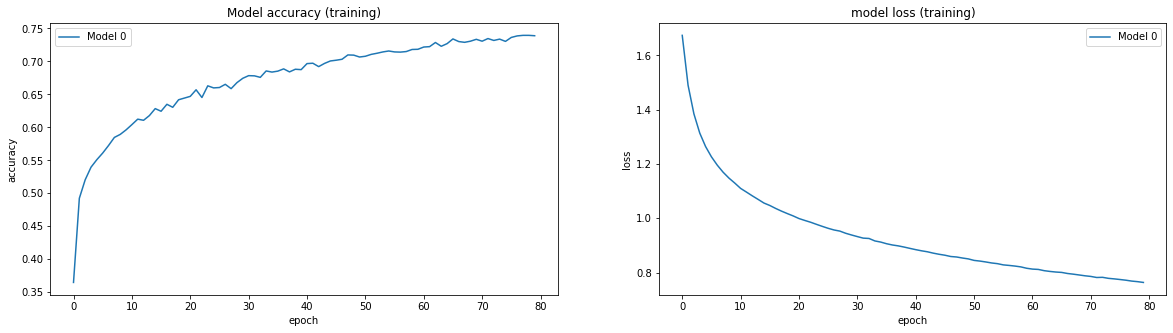

--------------------------


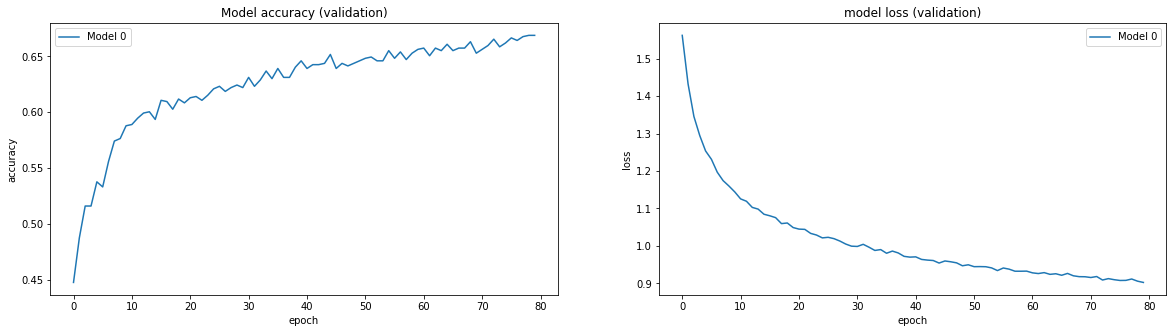

--------------------------


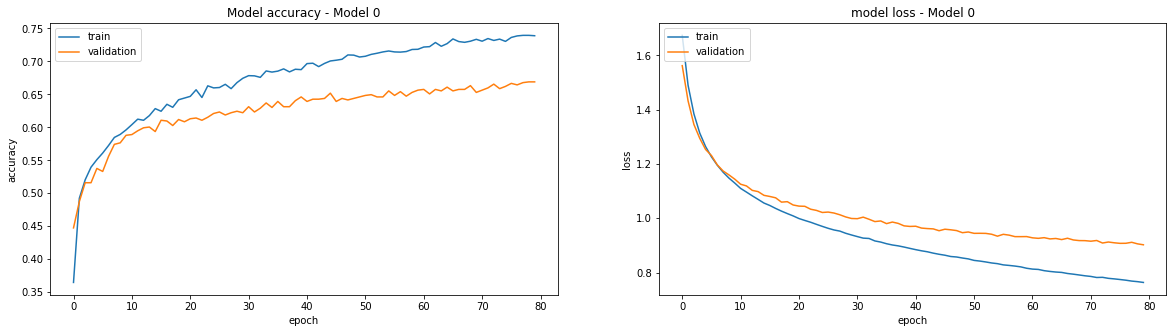

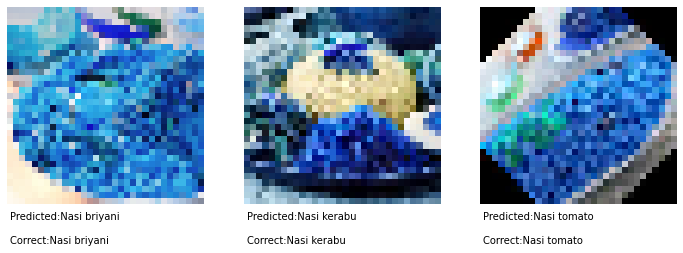

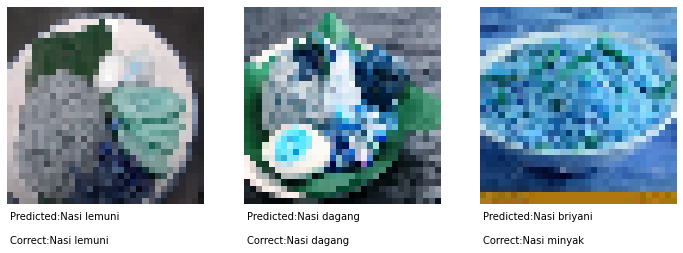

-----------------------


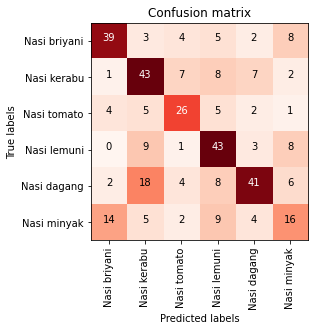

              precision    recall  f1-score   support

           0       0.65      0.64      0.64        61
           1       0.52      0.63      0.57        68
           2       0.59      0.60      0.60        43
           3       0.55      0.67      0.61        64
           4       0.69      0.52      0.59        79
           5       0.39      0.32      0.35        50

    accuracy                           0.57       365
   macro avg       0.57      0.56      0.56       365
weighted avg       0.58      0.57      0.57       365



In [31]:
path = 'vgg_large_dense_nasi-%i.hdf5'
get_test_loss_accs(path)
plot_acc_loss("training", histories2, 'accuracy', 'loss')
print("--------------------------")
plot_acc_loss('validation', histories2, 'val_accuracy', 'val_loss')
print("--------------------------")
plot_train_val("Model %i" % 0, histories2[0])

RUN = 0 #you can choose one of the different models trained above 
model = create_model2()
model.load_weights(path % RUN)
plot_sample_predictions(list(CATEGORIES), model, X_test_shaped, np.array(y_test))

predictions = model.predict(X_test_shaped, verbose = 0)
predictions = np.argmax(predictions, axis=1)
print("-----------------------")
plot_confusion_matrix(confusion_matrix(y_test, predictions), list(CATEGORIES))
print(classification_report(y_test, predictions))

In [38]:
histories3 = tunning_parameter(create_model3(), 'vgg_1024_dense_nasi-%i.hdf5')

Running iteration:0
Epoch 1/80
175/176 [============================>.] - ETA: 0s - loss: 1.6126 - accuracy: 0.4089
Epoch 1: val_loss improved from inf to 1.44938, saving model to vgg_1024_dense_nasi-0.hdf5
176/176 [==============================] - 39s 216ms/step - loss: 1.6125 - accuracy: 0.4090 - val_loss: 1.4494 - val_accuracy: 0.5091
Epoch 2/80
175/176 [============================>.] - ETA: 0s - loss: 1.3753 - accuracy: 0.5291
Epoch 2: val_loss improved from 1.44938 to 1.30459, saving model to vgg_1024_dense_nasi-0.hdf5
176/176 [==============================] - 36s 206ms/step - loss: 1.3751 - accuracy: 0.5293 - val_loss: 1.3046 - val_accuracy: 0.5457
Epoch 3/80
175/176 [============================>.] - ETA: 0s - loss: 1.2617 - accuracy: 0.5611
Epoch 3: val_loss improved from 1.30459 to 1.23636, saving model to vgg_1024_dense_nasi-0.hdf5
176/176 [==============================] - 36s 204ms/step - loss: 1.2614 - accuracy: 0.5613 - val_loss: 1.2364 - val_accuracy: 0.5719
Epoch 4/8

In [39]:
print('Training: \t%0.8f loss / %0.8f acc'   % (get_avg(histories3,'loss'), get_avg(histories3,'accuracy')))
print('Validation: \t%0.8f loss / %0.8f acc' % (get_avg(histories3,'val_loss'), get_avg(histories3,'val_accuracy')))

Training: 	0.57341552 loss / 0.81405312 acc
Validation: 	0.80380875 loss / 0.70433789 acc


running final test with model 0: 1.1059 loss / 0.5836 acc

Average loss / accuracy on testset: 1.2162 loss / 0.54356 acc
Standard deviation: (+-0.1661) loss / (+-0.0666) acc
------------1-----------


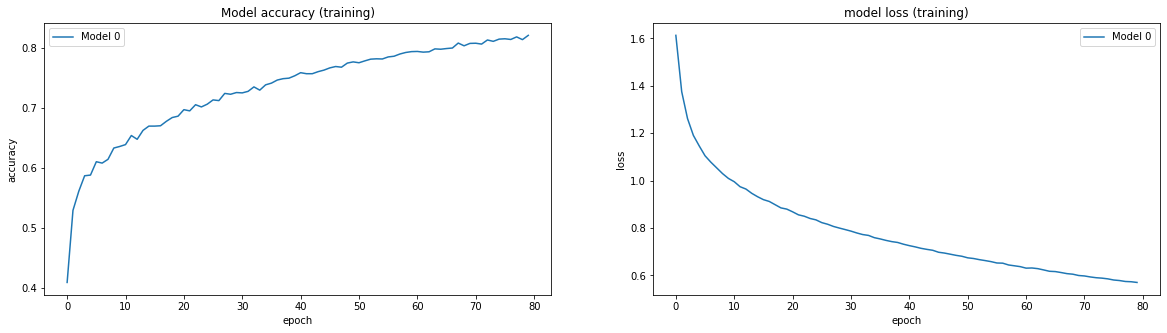

------------2-----------


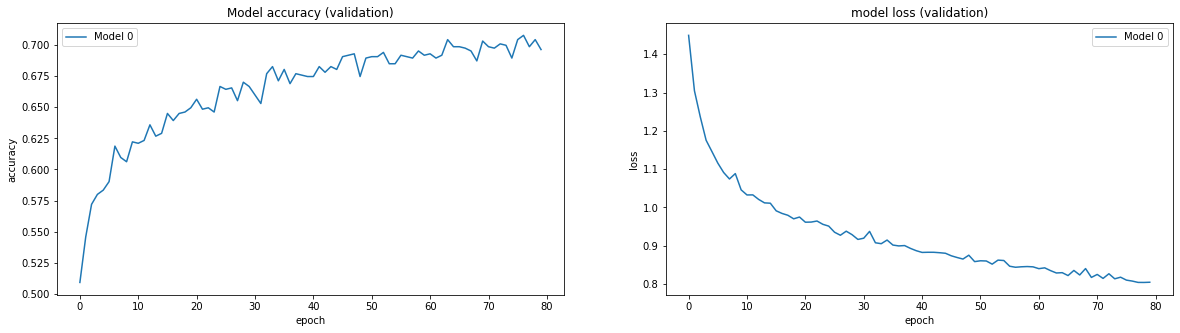

-------------3----------


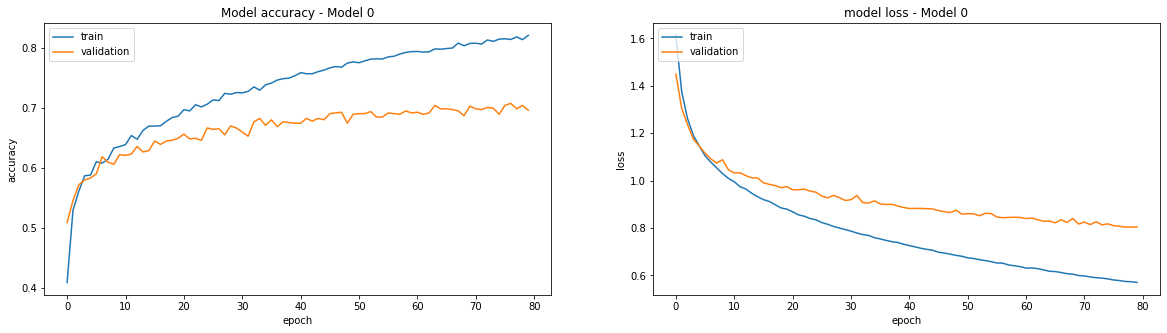

------------4-----------


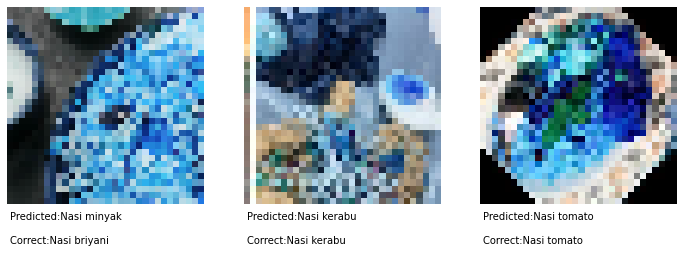

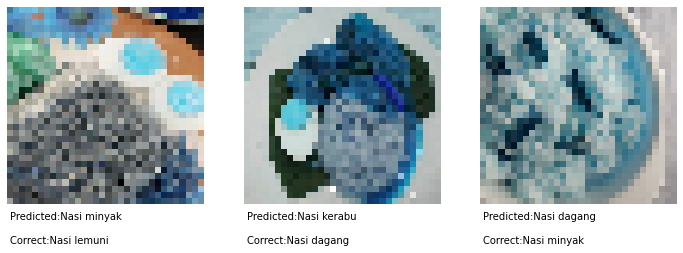

------------5-----------


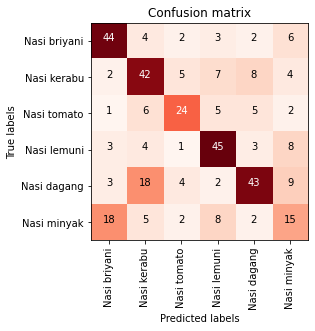

              precision    recall  f1-score   support

           0       0.62      0.72      0.67        61
           1       0.53      0.62      0.57        68
           2       0.63      0.56      0.59        43
           3       0.64      0.70      0.67        64
           4       0.68      0.54      0.61        79
           5       0.34      0.30      0.32        50

    accuracy                           0.58       365
   macro avg       0.57      0.57      0.57       365
weighted avg       0.58      0.58      0.58       365



In [41]:
path = 'vgg_1024_dense_nasi-%i.hdf5'
get_test_loss_accs(path)
print("------------1-----------")
plot_acc_loss("training", histories3, 'accuracy', 'loss')
print("------------2-----------")
plot_acc_loss('validation', histories3, 'val_accuracy', 'val_loss')
print("-------------3----------")
RUN = 0 #you can choose one of the different models trained above 
plot_train_val("Model %i" % RUN, histories3[RUN])
print("------------4-----------")
model = create_model3()
model.load_weights(path % RUN)
plot_sample_predictions(list(CATEGORIES), model, X_test_shaped, np.array(y_test))

predictions = model.predict(X_test_shaped, verbose = 0)
predictions = np.argmax(predictions, axis=1)
print("------------5-----------")
plot_confusion_matrix(confusion_matrix(y_test, predictions), list(CATEGORIES))
print(classification_report(y_test, predictions))

In [42]:
def create_model4():
    model = VGG16(include_top = False, input_shape = (IMG_SIZE, IMG_SIZE, channels))

    #add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(256, activation='relu')(flat1)
    class2 = Dense(256, activation='relu')(class1)
    class3 = Dense(256, activation='relu')(class2)
    output = Dense(num_classes, activation='softmax')(class3)

    #define new model
    model_new = Model(inputs = model.inputs, outputs = output)

    # make all layers untrainable by freezing weights (except for last layer)
    for l, layer in enumerate(model_new.layers[:-1]):
        layer.trainable = False

    # ensure the last layer is trainable/not frozen
    for l, layer in enumerate(model_new.layers[-1:]):
        layer.trainable = True

    model_new.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model_new 

In [43]:
create_model4().summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

In [45]:
histories4 = tunning_parameter(create_model4(), 'vgg_nasi-%i.hdf5')

Running iteration:0
Epoch 1/80
175/176 [============================>.] - ETA: 0s - loss: 1.7093 - accuracy: 0.3280
Epoch 1: val_loss improved from inf to 1.62865, saving model to vgg_nasi-0.hdf5
176/176 [==============================] - 48s 271ms/step - loss: 1.7093 - accuracy: 0.3279 - val_loss: 1.6286 - val_accuracy: 0.4281
Epoch 2/80
175/176 [============================>.] - ETA: 0s - loss: 1.5855 - accuracy: 0.4386
Epoch 2: val_loss improved from 1.62865 to 1.54374, saving model to vgg_nasi-0.hdf5
176/176 [==============================] - 43s 244ms/step - loss: 1.5855 - accuracy: 0.4384 - val_loss: 1.5437 - val_accuracy: 0.4475
Epoch 3/80
175/176 [============================>.] - ETA: 0s - loss: 1.5057 - accuracy: 0.4694
Epoch 3: val_loss improved from 1.54374 to 1.47691, saving model to vgg_nasi-0.hdf5
176/176 [==============================] - 37s 212ms/step - loss: 1.5058 - accuracy: 0.4693 - val_loss: 1.4769 - val_accuracy: 0.4703
Epoch 4/80
175/176 [======================

In [46]:
print('Training: \t%0.8f loss / %0.8f acc'   % (get_avg(histories4,'loss'), get_avg(histories4,'accuracy')))
print('Validation: \t%0.8f loss / %0.8f acc' % (get_avg(histories4,'val_loss'), get_avg(histories4,'val_accuracy')))

Training: 	0.96082455 loss / 0.66323906 acc
Validation: 	1.08471632 loss / 0.60502285 acc


running final test with model 0: 1.3039 loss / 0.5068 acc

Average loss / accuracy on testset: 1.2308 loss / 0.53744 acc
Standard deviation: (+-0.1551) loss / (+-0.0623) acc
------------1-----------


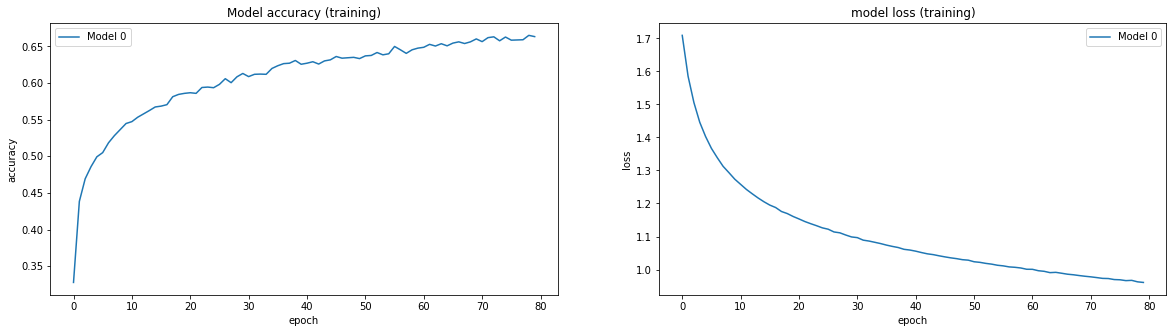

------------2-----------


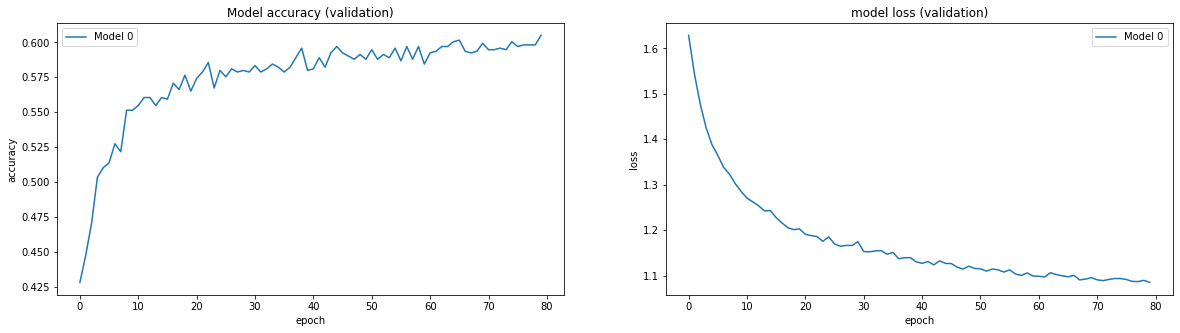

-------------3----------


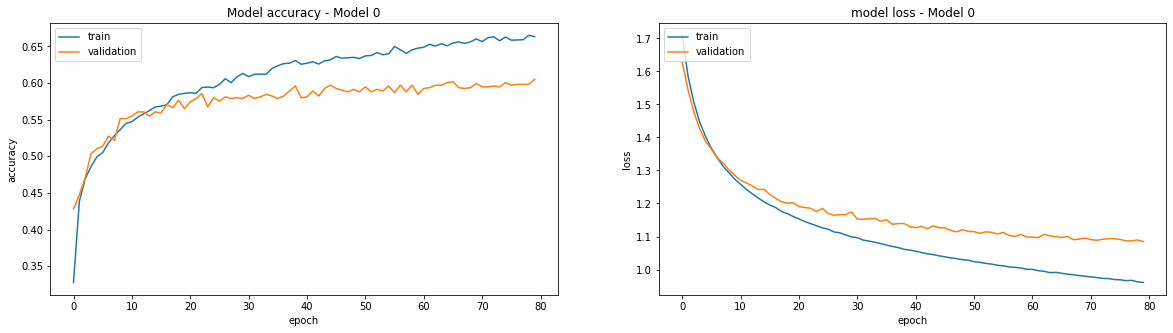

------------4-----------


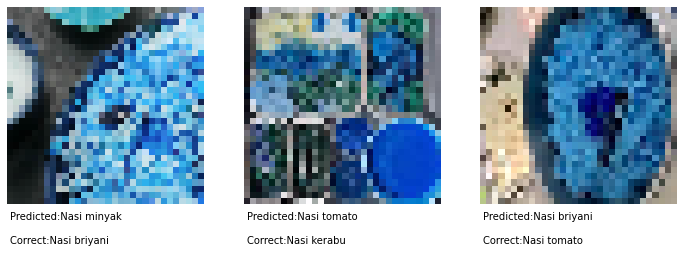

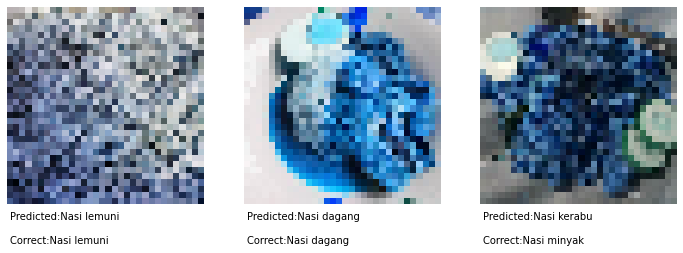

------------5-----------


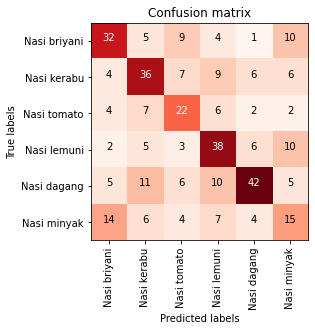

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        61
           1       0.51      0.53      0.52        68
           2       0.43      0.51      0.47        43
           3       0.51      0.59      0.55        64
           4       0.69      0.53      0.60        79
           5       0.31      0.30      0.31        50

    accuracy                           0.51       365
   macro avg       0.50      0.50      0.50       365
weighted avg       0.52      0.51      0.51       365



In [47]:
path = 'vgg_nasi-%i.hdf5'
get_test_loss_accs(path)
print("------------1-----------")
plot_acc_loss("training", histories4, 'accuracy', 'loss')
print("------------2-----------")
plot_acc_loss('validation', histories4, 'val_accuracy', 'val_loss')
print("-------------3----------")
RUN = 0 #you can choose one of the different models trained above 
plot_train_val("Model %i" % RUN, histories4[RUN])
print("------------4-----------")
model = create_model4()
model.load_weights(path % RUN)
plot_sample_predictions(list(CATEGORIES), model, X_test_shaped, np.array(y_test))

predictions = model.predict(X_test_shaped, verbose = 0)
predictions = np.argmax(predictions, axis=1)
print("------------5-----------")
plot_confusion_matrix(confusion_matrix(y_test, predictions), list(CATEGORIES))
print(classification_report(y_test, predictions))